<a href="https://colab.research.google.com/github/BobChrismansyah/Data-Mining/blob/main/Tugas4_H07120108_BobChrismansyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Bob Chrismansyah Pata'dungan Kabanga

## NIM : H071201087

## Prodi : Sistem Informasi

### DATA INTEGRATION

Data integration adalah beberapa data set yang digabungkan dimana data itu berasal dari sumber yang berbeda, dan hasil pengkombinasian itu akan disimpan ke penyimpanan misalnya data warehouse. Integrasi data bermanfaat agar terhindar dari duplikat data, jika terdapat duplikat data maka proses yang akan dilakukan akan terganggu, hasil analisispun tidak konsisten.

## **Prepocessing**

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Fish.csv")

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Kembalikan objek berukuran sama boolean yang menunjukkan jika nilainya NA. Nilai NA, seperti None atau numpy.NaN, dipetakan ke nilai True

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Menampilkan baris yang seri


In [7]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
cleanup_nums = {"Species":     {"Perch": 1.0, "Bream": 2.0, "Roach":3.0,"Pike":4.0,"Smelt":5.0,"Parkki":6.0,"Whitefish":7.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

Species    float64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [9]:
X = df.drop("Species",1)   #Feature Matrix
y = df["Species"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns)

     Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]


In [ ]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.716981,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.804117,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,1.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,4.000000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,7.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1.]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


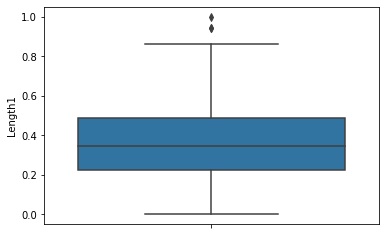

In [ ]:
import seaborn as sns
sns.boxplot(y=df['Length1'])

In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,2.0
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,2.0
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,2.0
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,2.0
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,2.0


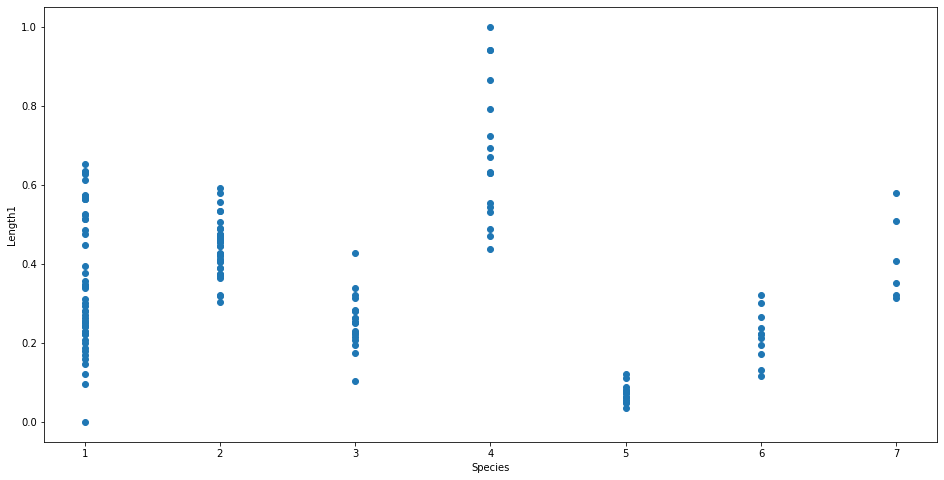

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Species'], df['Length1'])
ax.set_xlabel('Species')
ax.set_ylabel('Length1')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

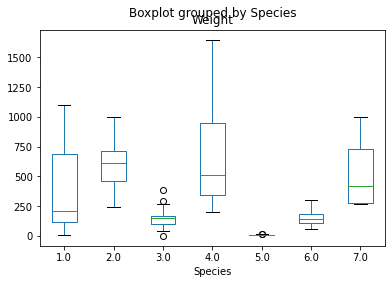

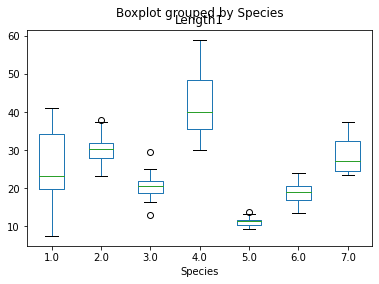

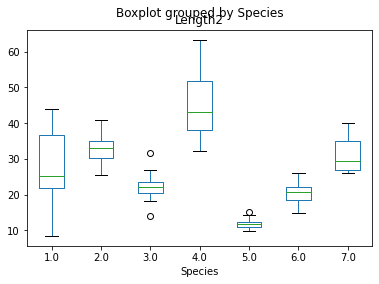

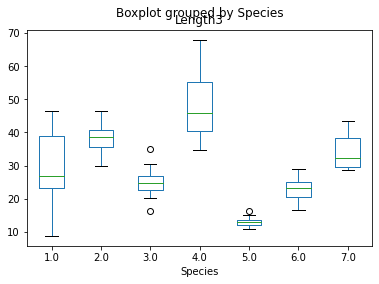

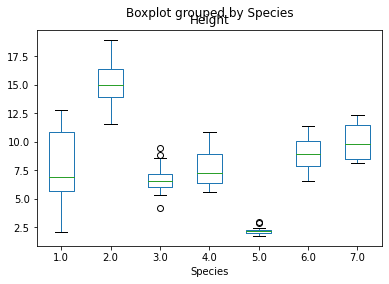

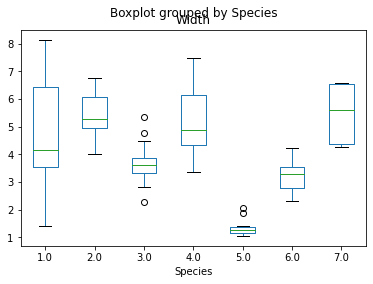

In [12]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Species",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Species', column =[i], grid = False)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     0.321212
Length1    0.265049
Length2    0.263636
Length3    0.278716
Height     0.372700
Width      0.309942
Species    3.000000
dtype: float64


In [ ]:
print(df.shape)

(159, 7)


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(156, 7)


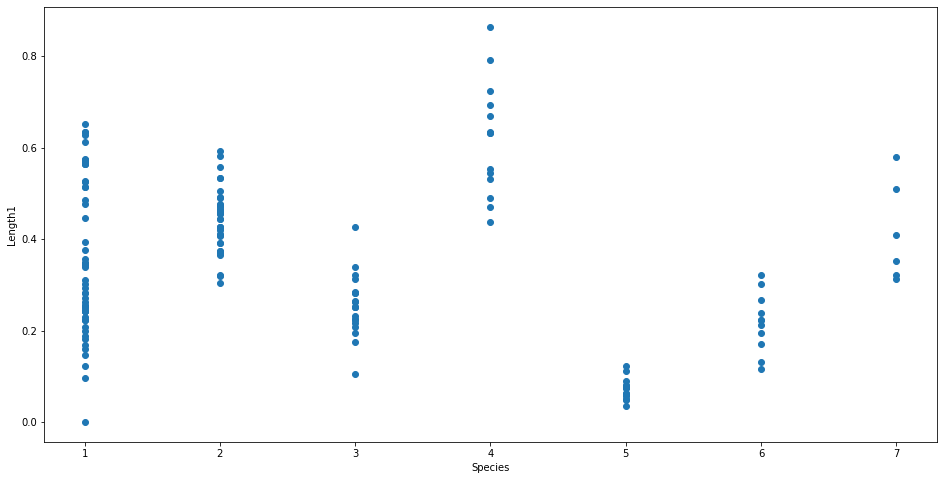

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Species'], df_out['Length1'])
ax.set_xlabel('Species')
ax.set_ylabel('Length1')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

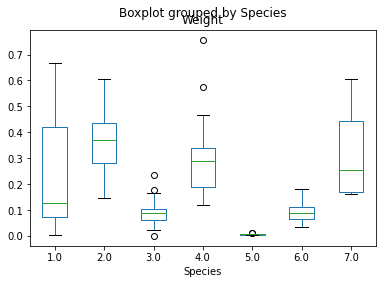

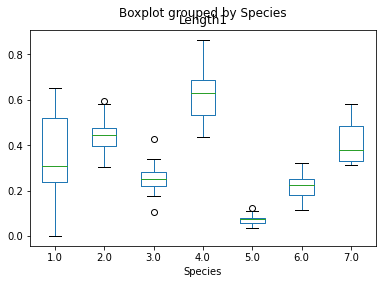

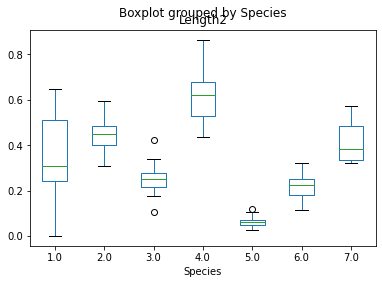

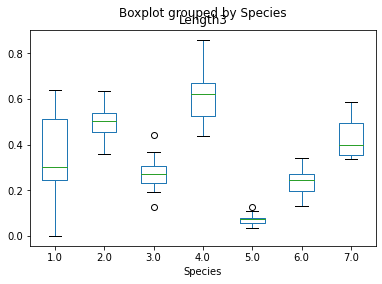

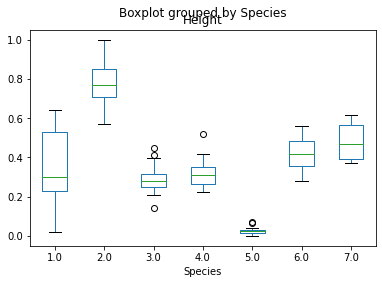

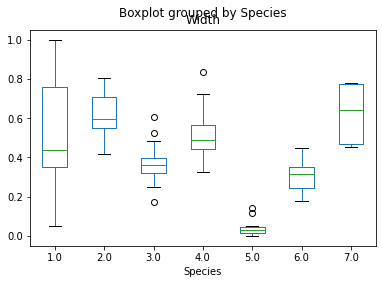

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Species",1)
y_fix = df_out["Species"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Species', column =[i], grid = False)

### **Feature Importance**

Memilih feature yang berpengaruh dari sekumpulan data yang asli, fitur itu diberikan fungsi statik sehingga dapat dilakukan pengurutan dalam sebuah nilai.

Uji Chi Square cocok digunakan untuk menganalisis data kasus sepeerti diatas.
Chi Square disebut juga dengan Kai Kuadrat. Chi Square adalah salah satu jenis uji komparatif non parametris yang dilakukan pada dua variabel, di mana skala data kedua variabel adalah nominal. (Apabila dari 2 variabel, ada 1 variabel dengan skala nominal maka dilakukan uji chi square dengan merujuk bahwa harus digunakan uji pada derajat yang terendah). Berikut akan kita bahas tentang rumus chi square.



1. Univariate Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=2) 

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Spesific Fish','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

  Spesific Fish  chi-square Score      p-values
6           NaN        189.142857  3.871009e-38
4        Height         17.781620  6.801753e-03
0        Weight          9.576693  1.436478e-01
5         Width          8.882441  1.802982e-01
3       Length3          8.408297  2.096899e-01
2       Length2          8.147070  2.275254e-01
1       Length1          7.892925  2.460533e-01


2. SVM-RFE

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.iloc[:,0:77]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1 # dia akan berhenti untuk melakukan training jika fiturnya tinggal 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [ ]:
# Put the mean scores into a Pandas dataframe
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
df_rank = df_rank.sort_values('Scores', ascending=False)

In [ ]:
df_rank

,Feature,Scores
6,Species,1.00
1,Length1,0.83
4,Height,0.67
2,Length2,0.50
3,Length3,0.33
5,Width,0.17
0,Weight,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


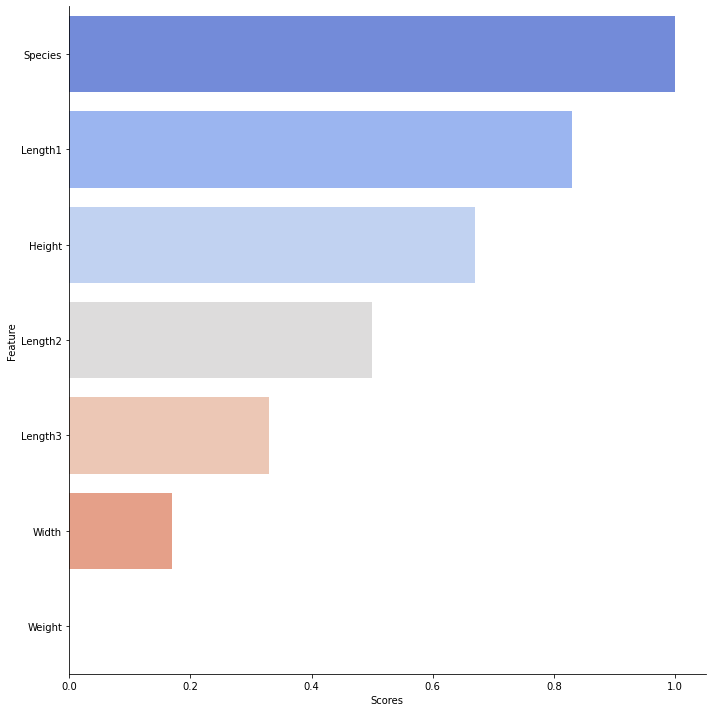

In [ ]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')

3. Extratrees

[0.05928073 0.07630175 0.06660021 0.08627577 0.17585993 0.07288749
 0.46279412]


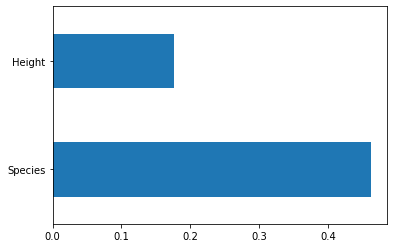

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

4. Correlation Matrix with Heatmap

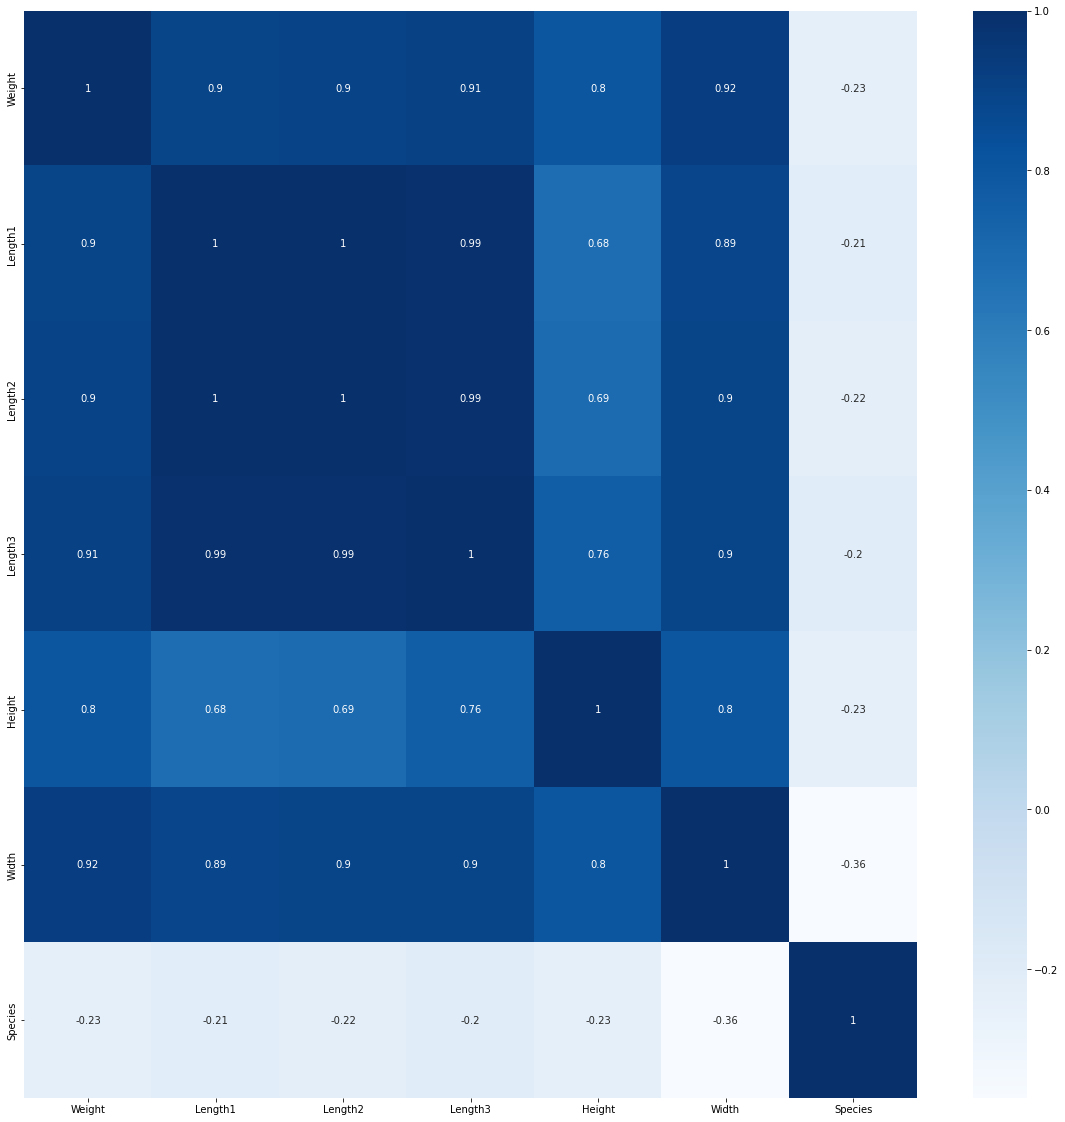

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="Blues")

### **Feature Extraction**

Membuat deature baru berdasarkan feature yabg lama dengan dimensi yang lebih sedikit, caranya yaitu meggunakan feature extraction dengan princpal componen analisis

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 from matplotlib import offsetbox
 from sklearn import manifold, datasets, decomposition, discriminant_analysis

 digits = datasets.load_digits()

 X = digits.data
 y = digits.target

 n_samples, n_features = X.shape

1. LDA

Cara kerja LDA yaitu memisahkan data yang  distance datanya diperbesar dan menghitung means dan mencari variasi dari data, Kumpulan data ang variansinya kecil maka data itu akan semakin mirip, sedangkan jika distancenya semakin besar maka data itu akan terpisah dengan baik.

In [ ]:
 def embedding_plot(X, title):
     x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
     X = (X - x_min) / (x_max - x_min)
     plt.figure()
     ax = plt.subplot(aspect='equal')
     sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
     shown_images = np.array([[1., 1.]])
     for i in range(X.shape[0]):
         if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
         shown_images = np.r_[shown_images, [X[i]]]
         ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
     plt.xticks([]), plt.yticks([])
     plt.title(title)

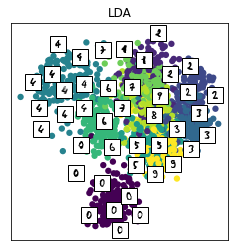

In [ ]:
 X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
 embedding_plot(X_lda, "LDA")
 plt.show()

In [ ]:
 X_lda

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])

In [ ]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

lda_df = pd.DataFrame(data = lda
             , columns = ['new_var1', 'new_var2'])
finalDf = pd.concat([lda_df, y_fix], axis = 1)
finalDf.head()

,new_var1,new_var2,Species
0,8.860520,0.998471,2.0
1,10.135538,0.776849,2.0
2,8.701235,0.000937,2.0
3,8.592589,1.014276,2.0
4,8.441014,1.211575,2.0


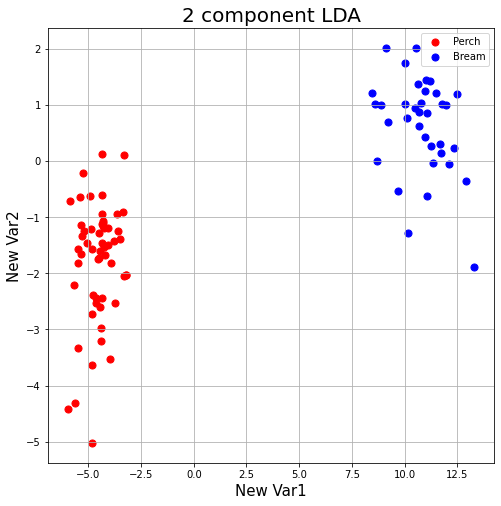

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['red', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'new_var1']
               , finalDf.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Perch", "Bream", "Roach","Pike","Smelt","Parkki","Whitefish"])
ax.grid()

2. PCA

PCA bekerja untuk menghitung varuance dari tiap atribut

In [ ]:
#first reduxe de dimensin
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fix)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_fix], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Species
0,-0.023239,-0.163746,2.0
1,0.052538,-0.190521,2.0
2,0.088388,-0.181787,2.0
3,0.135009,-0.156899,2.0
4,0.194147,-0.133827,2.0


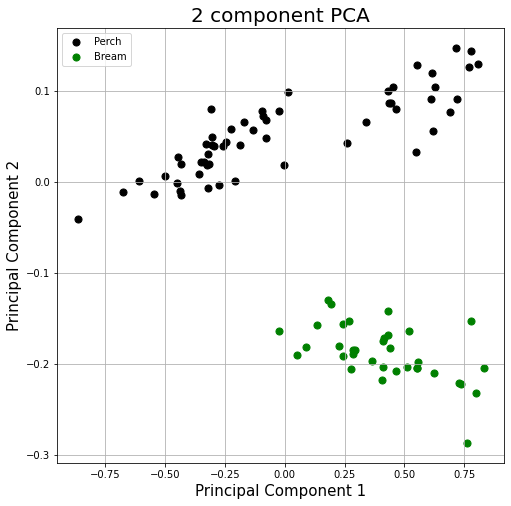

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0]
colors = ['black', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Perch", "Bream", "Roach","Pike","Smelt","Parkki","Whitefish"])
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_fix)
print(X_2d)

[[  2.9721246    1.9460177 ]
 [  2.5309587    2.6354494 ]
 [  2.2349603    2.9226198 ]
 [  1.8874853    3.5137715 ]
 [  1.2138802    3.6600296 ]
 [  1.0746905    4.1923156 ]
 [  0.42948404   4.448856  ]
 [  1.5706857    3.8692842 ]
 [  1.0348294    4.4315057 ]
 [  0.63410604   4.9288116 ]
 [  0.4864454    4.7437983 ]
 [  0.78754866   5.114605  ]
 [  1.3117561    4.9404774 ]
 [  1.2508944    4.656132  ]
 [  0.0539627    5.433864  ]
 [ -0.48422232   5.302341  ]
 [ -0.5815966    5.6565495 ]
 [ -0.37076703   5.921363  ]
 [ -0.15050203   5.9670095 ]
 [ -1.0328015    5.2728543 ]
 [ -0.7949867    5.400996  ]
 [ -0.9008193    6.2120814 ]
 [ -0.5718133    6.0756154 ]
 [ -1.6485621    5.7167363 ]
 [ -1.2525202    6.2814283 ]
 [ -1.7805849    6.188502  ]
 [ -1.8008057    6.155059  ]
 [ -1.682788     6.4239626 ]
 [ -2.410467     6.4527545 ]
 [ -3.2038653    6.9076757 ]
 [ -3.033774     6.577453  ]
 [ -3.1085448    6.600431  ]
 [ -3.451224     6.669572  ]
 [ -3.6370697    6.5598545 ]
 [ -3.5160816 

In [ ]:
new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, y_fix], axis = 1)
tsne_df.head()

,feature 1,feature 2,Species
0,2.972125,1.946018,2.0
1,2.530959,2.635449,2.0
2,2.234960,2.922620,2.0
3,1.887485,3.513772,2.0
4,1.213880,3.660030,2.0


3. t-SNE

Ini adalah tekhnik reduksi nonlinear cocok untuk data memvisualisasikan data yang berdimensi tinggi ke data yang lebih rendah (3D ke 2D)

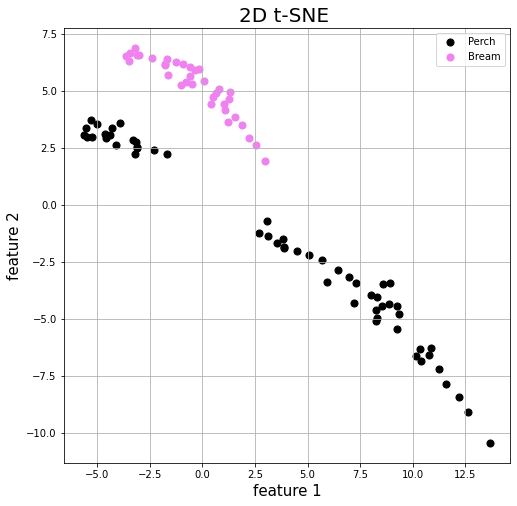

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [1.0,2.0]
colors = ['black', 'violet']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['Species'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["Perch", "Bream", "Roach","Pike","Smelt","Parkki","Whitefish"])
ax.grid()